In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('belle2')
import numpy as np
import pdg
import root_pandas

treefile='../Ntuples/MC_mu_10k_cut_ROEmasked.root'
df = root_pandas.read_root(treefile, key='B0')
df['B0_isSignal'] = df['B0_isSignal'].fillna(-1)
df['D_isSignal'] = df['D_isSignal'].fillna(-1)
df['mu_isSignal'] = df['mu_isSignal'].fillna(-1)
df['B0_mcPDG'] = df['B0_mcPDG'].fillna(0)
df_event = df[['Ecms', 'IPX', 'IPY', 'IPZ','missingMomentumOfEvent','missingMomentumOfEventCMS',
                'missingEnergyOfEventCMS','missingMass2OfEvent','visibleEnergyOfEventCMS',
                'totalPhotonsEnergyOfEvent']]
df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
df.eval('p_D_l = D_CMS_p + mu_CMS_p', inplace=True)
df.eval('B0_TagVReChi2= B0_TagVChi2 / B0_TagVNDF', inplace=True)
df.eval('B0_TagVReChi2IP= B0_TagVChi2IP / B0_TagVNDF', inplace=True)

Welcome to JupyROOT 6.24/00


### Final Cuts and Best Candidate Selection

In [2]:
#df_cut=df.query('B0_nROE_e==0 and B0_nROE_mu==0 and B0_roeMbc_my_mask>4 and B0_roeCharge_my_mask==0').copy()
df_cut=df.query('mu_p>0.6').copy()
df_bestSelected=df_cut.loc[df_cut.groupby('__event__').B_D_ReChi2.idxmin()]
#df_bestSelected['__ncandidates__']=df_bestSelected.groupby('__event__').transform(len)

In [3]:
# B decay
B_meson='B0_mcPDG==511 or B0_mcPDG==-511 or B0_mcPDG==521 or B0_mcPDG==-521'
tau_modes = 'DecayMode=="D_tau_nu" or DecayMode=="Dst_tau_nu" or DecayMode=="Dstst_tau_nu"'
e_modes = 'DecayMode=="D_e_nu" or DecayMode=="Dst_e_nu" or DecayMode=="Dstst_e_nu"'
mu_modes = 'DecayMode=="D_mu_nu" or DecayMode=="Dst_mu_nu" or DecayMode=="Dstst_mu_nu"'
bkg_misIdAndTwoD = 'DecayMode=="bkg"'
# Not B decay
bkg_combinatorial_oneBsignal = 'B0_mcPDG==300553 and DecayMode!="bkg"'
bkg_combinatorial_noBsignal = 'B0_mcPDG==300553 and DecayMode=="bkg"'
bkg_BDaughterDecay = 'B0_mcPDG!=511 and B0_mcPDG!=-511 and B0_mcPDG!=521 and B0_mcPDG!=-521 \
and B0_mcPDG!=300553 and B0_mcPDG!=0 and B0_isContinuumEvent!=1'
bkg_misId2='B0_mcPDG==0'
bkg_continuum = 'B0_isContinuumEvent==1'

df_B_mother = df_bestSelected.query(B_meson)
df_tau = df_B_mother.query(tau_modes)
df_e = df_B_mother.query(e_modes)
df_mu = df_B_mother.query(mu_modes)
df_bkg_misIdAndTwoD = df_B_mother.query(bkg_misIdAndTwoD)
# Not B decay
df_bkg_comb_oneBsignal = df_bestSelected.query(bkg_combinatorial_oneBsignal)
df_bkg_comb_noBsignal = df_bestSelected.query(bkg_combinatorial_noBsignal)
df_bkg_BDaughterDecay = df_bestSelected.query(bkg_BDaughterDecay)
df_bkg_misId2 = df_bestSelected.query(bkg_misId2)
df_bkg_continuum = df_bestSelected.query(bkg_continuum)

D_e_nu=df_e.query('DecayMode=="D_e_nu"')
D_mu_nu=df_mu.query('DecayMode=="D_mu_nu"')
D_tau_nu=df_tau.query('DecayMode=="D_tau_nu"')
Dst_e_nu=df_e.query('DecayMode=="Dst_e_nu"')
Dst_mu_nu=df_mu.query('DecayMode=="Dst_mu_nu"')
Dst_tau_nu=df_tau.query('DecayMode=="Dst_tau_nu"')
Dstst_e_nu=df_e.query('DecayMode=="Dstst_e_nu"')
Dstst_mu_nu=df_mu.query('DecayMode=="Dstst_mu_nu"')
Dstst_tau_nu=df_tau.query('DecayMode=="Dstst_tau_nu"')

In [6]:
def statistics(df):
    counts=df.count()
    mean=df.mean()
    std=df.std()
    return f'''counts = {counts} \nmean = {round(mean,3)} \nstd = {round(std,3)}'''

kwarg={'bins':25, 'histtype':'step','lw':2}

def plot_components(variable):
    D_tau_nu[variable].hist(bins=25,label=f'tau \n{statistics(D_tau_nu[variable])}')
    D_e_nu[variable].hist(label=f'e \n{statistics(D_e_nu[variable])}',**kwarg)
    df_mu[variable].hist(label=f'mu \n{statistics(df_mu[variable])}',**kwarg)
    df_bkg_misIdAndTwoD[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD[variable])}',**kwarg)
    df_bkg_comb_oneBsignal[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal[variable])}',**kwarg)
    df_bkg_comb_noBsignal[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal[variable])}',**kwarg)
    df_bkg_BDaughterDecay[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay[variable])}',**kwarg)
    df_bkg_misId2[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2[variable])}',**kwarg)
    df_bkg_continuum[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_components_withcut(cut,variable):
    D_tau_nu.query(cut)[variable].hist(bins=25,label=f'tau \n{statistics(D_tau_nu.query(cut)[variable])}')
    D_e_nu.query(cut)[variable].hist(label=f'e \n{statistics(D_e_nu.query(cut)[variable])}',**kwarg)
    df_mu.query(cut)[variable].hist(label=f'mu \n{statistics(df_mu.query(cut)[variable])}',**kwarg)
    df_bkg_misIdAndTwoD.query(cut)[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD.query(cut)[variable])}',**kwarg)
    df_bkg_comb_oneBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_comb_noBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal.query(cut)[variable])}',**kwarg)
    df_bkg_BDaughterDecay.query(cut)[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay.query(cut)[variable])}',**kwarg)
    df_bkg_misId2.query(cut)[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2.query(cut)[variable])}',**kwarg)
    df_bkg_continuum.query(cut)[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum.query(cut)[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=3, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_signal(variable):
    D_tau_nu[variable].hist(bins=25,label=f'D_tau_nu \n{statistics(D_tau_nu[variable])}')
    Dst_tau_nu[variable].hist(label=f'Dst_tau_nu \n{statistics(Dst_tau_nu[variable])}',**kwarg)
    Dstst_tau_nu[variable].hist(label=f'Dstst_tau_nu \n{statistics(Dstst_tau_nu[variable])}',**kwarg)
    D_mu_nu[variable].hist(label=f'D_mu_nu \n{statistics(D_mu_nu[variable])}',**kwarg)
    Dst_mu_nu[variable].hist(label=f'Dst_mu_nu \n{statistics(Dst_mu_nu[variable])}',**kwarg)
    Dstst_mu_nu[variable].hist(label=f'Dstst_mu_nu \n{statistics(Dstst_mu_nu[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=2, fancybox=True, shadow=True,labelspacing=1.5)
    
def plot_projection(cut,variable):
    D_tau_nu.query(cut)[variable].hist(bins=25,label=f'D_tau_nu \n{statistics(D_tau_nu.query(cut)[variable])}')
    D_mu_nu.query(cut)[variable].hist(label=f'D_mu_nu \n{statistics(D_mu_nu.query(cut)[variable])}',**kwarg)
#    Dst_mu_nu.query(cut)[variable].hist(label=f'Dst_mu_nu \n{statistics(Dst_mu_nu.query(cut)[variable])}',**kwarg)
#    df_bkg_misIdAndTwoD.query(cut)[variable].hist(label=f'bkg_misIdAndTwoD \n{statistics(df_bkg_misIdAndTwoD.query(cut)[variable])}',**kwarg)
    df_bkg_comb_oneBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_oneBsignal \n{statistics(df_bkg_comb_oneBsignal.query(cut)[variable])}',**kwarg)
#    df_bkg_comb_noBsignal.query(cut)[variable].hist(label=f'bkg_combinatorial_noBsignal \n{statistics(df_bkg_comb_noBsignal.query(cut)[variable])}',**kwarg)
#    df_bkg_BDaughterDecay.query(cut)[variable].hist(label=f'bkg_BDaughterDecay \n{statistics(df_bkg_BDaughterDecay.query(cut)[variable])}',**kwarg)
#    df_bkg_misId2.query(cut)[variable].hist(label=f'bkg_misId2 \n{statistics(df_bkg_misId2.query(cut)[variable])}',**kwarg)
#    df_bkg_continuum.query(cut)[variable].hist(label=f'bkg_continuum \n{statistics(df_bkg_continuum.query(cut)[variable])}',**kwarg)
#    Dst_tau_nu.query(cut)[variable].hist(label=f'Dst_tau_nu \n{statistics(Dst_tau_nu.query(cut)[variable])}',**kwarg)
#    Dstst_mu_nu.query(cut)[variable].hist(label=f'Dstst_mu_nu \n{statistics(Dstst_mu_nu.query(cut)[variable])}',**kwarg)
#    Dstst_tau_nu.query(cut)[variable].hist(label=f'Dstst_tau_nu \n{statistics(Dstst_tau_nu.query(cut)[variable])}',**kwarg)
    plt.legend(bbox_to_anchor=(1,1),ncol=1, fancybox=True, shadow=True,labelspacing=1.5)

In [ ]:
plot_components_withcut('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5', 'B0_nROE_pi')

In [ ]:
plot_components_withcut('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5', 'p_D_l')

In [ ]:
plot_components('MM2')

In [ ]:
plot_components('genMissingMass2OfEvent')

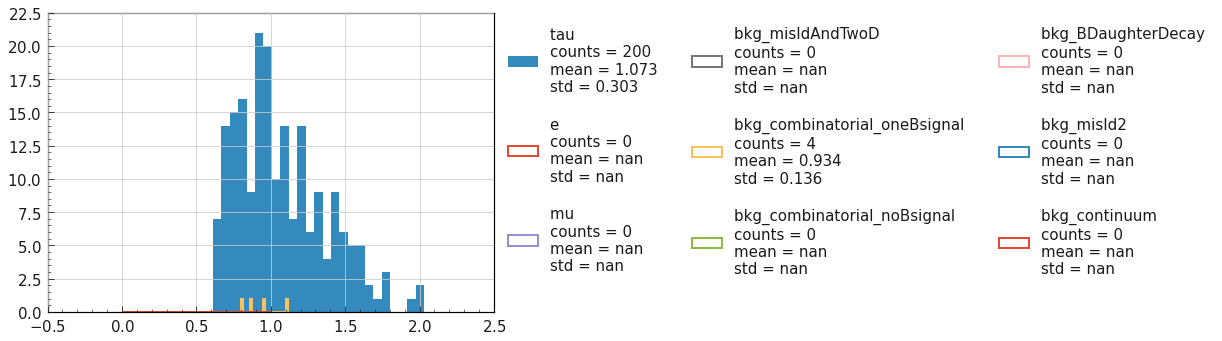

In [43]:
plot_components_withcut('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5 and mu_p>0.6', 'mu_p')

Text(0.5, 1.0, 'Reconstruct $B_{sig}(D\\mu)$ only')

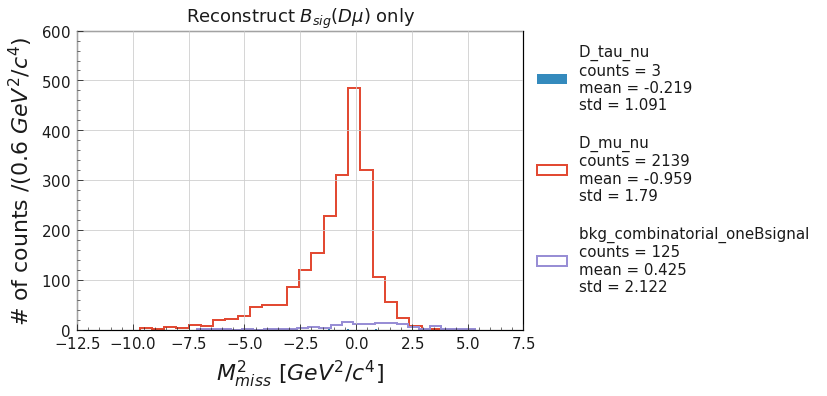

In [7]:
plot_projection('mu_p>0.6 and MM2>-10', 'MM2')
plt.xlabel("$M_{miss}^2\ [GeV^2/c^4]$")
plt.ylabel('# of counts /(0.6 $GeV^2/c^4$)')
plt.title('Reconstruct $B_{sig}(D\mu)$ only')

In [ ]:
plot_projection('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5', 'MM2')

In [ ]:
plot_projection('e_CMS_p>1.1 and B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5', 'MM2')

In [ ]:
plot_projection('p_D_l<2.5 and B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5', 'MM2')

In [ ]:
plot_projection('p_D_l>2.5 and B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5', 'MM2')

In [ ]:
plot_components_withcut(cut='abs(cos_pmiss_z)<0.9 and abs(B0_roeDeltae_my_mask)<0.8',variable='B0_roeMbc_my_mask')

In [ ]:
plot_components_withcut(cut='p_D_l>2.5 and B0_roeMbc_my_mask>5.26',variable='B0_roeDeltae_my_mask')

In [ ]:
plot_components('cos_pmiss_z')

In [ ]:
plot_components_withcut('cos_pmiss_z>-0.7 and B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5','MM2')

In [ ]:
plot_components_withcut('B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5','cos_pmiss_z')

In [ ]:
plot_signal('cos_D_l')

In [ ]:
plot_components('cos_D_l')

In [ ]:
plot_components('B0_R2')

In [ ]:
plot_components('B0_thrustBm')

In [ ]:
plot_components('B0_thrustOm')

In [ ]:
plot_components('B0_cosTBTO')

In [ ]:
plot_components('B0_cosTBz')

In [ ]:
plot_components_withcut(cut='e_CMS_p<1.1 and B0_R2<0.25',variable='MM2')

In [ ]:
plot_components_withcut(cut='e_CMS_p>1.1',variable='MM2')

Text(0, 0.5, 'withROE ${m_{missing}}^2$')

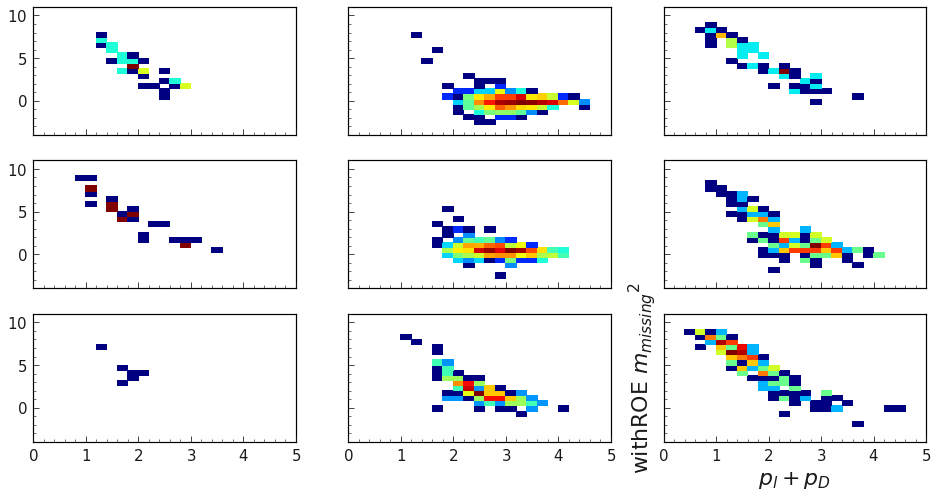

In [17]:
name_list = [r'$D\tau_e\nu$',r'$D*\tau_e\nu$',r'$D**\tau_e\nu$',
             r'$De\nu$',r'$D*e\nu$',r'$D**e\nu$',
             'bkg_misIdAndTwoD','bkg_combinatorial','bkg_randomComb']
df_list = [D_tau_nu,Dst_tau_nu,Dstst_tau_nu, 
           D_e_nu,Dst_e_nu,Dstst_e_nu, 
           df_bkg_misIdAndTwoD,df_bkg_comb,df_bkg_randomComb]

df_dict = dict(zip(name_list, df_list))

cuts='B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5'

n_rows,n_cols = [3,3]
fig,ax=plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,8),sharex=True, sharey='all')
k=0
for j in range(n_cols):
    for i in range(n_rows):
        ax[i,j].set_title=name_list[k]
        ax[i,j].hist2d(df_dict[name_list[k]].query(cuts).p_D_l, df_dict[name_list[k]].query(cuts).MM2,
                       range=[[0,5],[-4,11]],bins=25,cmap='jet',norm=colors.LogNorm())
        k+=1
plt.xlabel('$p_l + p_D}$')
plt.ylabel('withROE ${m_{missing}}^2$')

Text(0, 0.5, 'withROE ${m_{missing}}^2$')

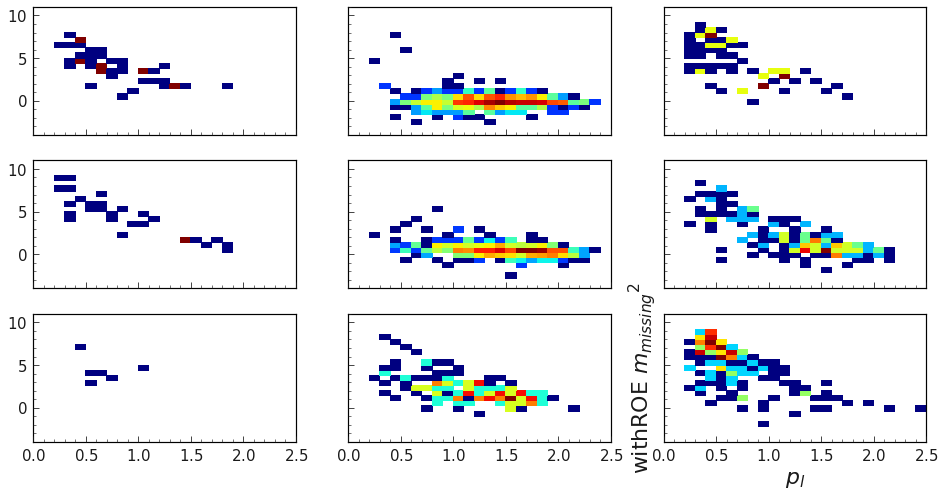

In [22]:
name_list = [r'$D\tau_e\nu$',r'$D*\tau_e\nu$',r'$D**\tau_e\nu$',
             r'$De\nu$',r'$D*e\nu$',r'$D**e\nu$',
             'bkg_misIdAndTwoD','bkg_combinatorial','bkg_randomComb']
df_list = [D_tau_nu,Dst_tau_nu,Dstst_tau_nu, 
           D_e_nu,Dst_e_nu,Dstst_e_nu, 
           df_bkg_misIdAndTwoD,df_bkg_comb,df_bkg_randomComb]

df_dict = dict(zip(name_list, df_list))

cuts='B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5'

n_rows,n_cols = [3,3]
fig,ax=plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(16,8),sharex=True, sharey='all')
k=0
for j in range(n_cols):
    for i in range(n_rows):
        ax[i,j].set_title=name_list[k]
        ax[i,j].hist2d(df_dict[name_list[k]].query(cuts).e_CMS_p, df_dict[name_list[k]].query(cuts).MM2,
                       range=[[0,2.5],[-4,11]],bins=25,cmap='jet',norm=colors.LogNorm())
        k+=1
plt.xlabel('$p_l$')
plt.ylabel('withROE ${m_{missing}}^2$')

In [2]:
np.reshape(df.columns,(1,375))

array([['__experiment__', '__run__', '__event__', '__candidate__',
        '__ncandidates__', '__weight__', 'Ecms', 'IPX', 'IPY', 'IPZ',
        'missingMomentumOfEvent', 'missingMomentumOfEvent_Px',
        'missingMomentumOfEvent_Py', 'missingMomentumOfEvent_Pz',
        'missingMomentumOfEvent_theta', 'missingMomentumOfEventCMS',
        'missingMomentumOfEventCMS_Px', 'missingMomentumOfEventCMS_Py',
        'missingMomentumOfEventCMS_Pz',
        'missingMomentumOfEventCMS_theta', 'missingEnergyOfEventCMS',
        'missingMass2OfEvent', 'visibleEnergyOfEventCMS',
        'totalPhotonsEnergyOfEvent', 'B0_CMS_px', 'B0_CMS_py',
        'B0_CMS_pz', 'B0_CMS_pt', 'B0_CMS_p', 'B0_CMS_E', 'B0_Mbc',
        'B0_deltaE', 'B0_M', 'B0_ErrM', 'B0_SigM', 'B0_InvM',
        'B0_isSignal', 'B0_mcErrors', 'B0_mcPDG', 'B0_dM', 'B0_Q',
        'B0_dQ', 'B0_missingMass2OfEvent', 'B0_m2Recoil', 'B0_cos_pV',
        'B0_cos_pB', 'B0_vtxReChi2', 'B0_vtxNDF', 'B0_vtxDD',
        'B0_vtxDDSig', 'B0_Decay

## 1. $De$

In [3]:
De_info= df[['B0_CMS_p','B0_CMS_E','B0_deltaE','B0_Mbc', 'B0_SigM', 'B0_InvM',
             'B0_dM', 'B0_Q','B0_dQ','B0_isSignal', 'B0_missingMass2OfEvent', 
             'B0_m2Recoil', "B0_R2","B0_thrustBm","B0_thrustOm","B0_cosTBTO","B0_cosTBz","B0_isContinuumEvent",
             'B0_vtxReChi2', 'B0_vtxDD','B0_vtxDDSig','DecayMode','MM2']]
De_info.describe()

,B0_CMS_p,B0_CMS_E,B0_deltaE,B0_Mbc,B0_SigM,B0_InvM,B0_dM,B0_Q,B0_dQ,B0_isSignal,B0_mcErrors,B0_mcPDG,B0_missingMass2OfEvent,B0_m2Recoil,B0_cos_pV,B0_cos_pB,B0_vtxReChi2,B0_vtxDD,B0_vtxDDSig,MM2
count,518916.000000,518916.000000,518916.000000,518916.000000,518915.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000,518916.000000
mean,1.135540,3.068158,-2.221620,5.148507,-528.169916,2.824882,-2.468082,0.941180,-2.468309,-0.017369,347.682681,193152.872981,2.255290,55.323866,0.143432,-7.232047,1.743029,0.022828,4.025595,4.791414
std,0.419773,0.606971,0.606971,0.094749,403.611142,0.640601,0.641429,0.641816,0.641816,0.130642,171.229511,144011.538150,5.630029,9.011798,0.711704,9.366804,46.437842,0.059502,5.800442,3.183179
min,0.017095,2.289780,-2.999999,4.900001,-1886.885994,1.957745,-4.006218,-2.294665,-5.704155,-1.000000,8.000000,-20433.000000,-54.342564,12.601125,-1.000000,-770.072503,-24875.333333,0.000089,0.000762,-8.933299
25%,0.822429,2.583570,-2.706209,5.086012,-822.119272,2.327199,-2.962574,0.446891,-2.962599,0.000000,312.000000,511.000000,-0.910414,48.597426,-0.586378,-10.228240,1.043607,0.006667,1.266380,2.213640
50%,1.130800,2.898226,-2.391553,5.167499,-405.933181,2.616998,-2.676108,0.733375,-2.676114,0.000000,432.000000,300553.000000,1.196365,57.211263,0.329430,-4.957428,1.724908,0.012845,2.242125,5.365530
75%,1.454042,3.461608,-1.828171,5.225454,-183.421446,3.186898,-2.108427,1.301062,-2.108427,0.000000,496.000000,300553.000000,4.647124,62.796946,0.826176,-1.364433,2.719641,0.025553,4.260540,7.403519
max,1.992924,6.844397,1.554618,5.289751,125.758816,6.726165,1.465383,4.874872,1.465383,0.000000,512.000000,300553.000000,54.215435,68.701440,1.000000,3.103342,4.999966,17.239495,236.426198,11.916469


In [29]:
df.__event__.nunique()

387878

In [5]:
df_bestSelected.query('B0_roeMbc_my_mask>5.26 and abs(B0_roeDeltae_my_mask)<0.5').groupby(['B0_mcPDG','DecayMode']).__event__.nunique().unstack()

DecayMode,D_e_nu,D_mu_nu,D_tau_nu,Dst_e_nu,Dst_mu_nu,Dst_tau_nu,Dstst_e_nu,Dstst_mu_nu,Dstst_tau_nu,bkg
B0_mcPDG,,,,,,,,,,
-511.0,366,0,19,277,0,12,60,0,3,25
0.0,4,0,1,7,0,0,3,0,0,6
511.0,437,0,21,361,0,14,81,0,3,29
30443.0,0,0,0,0,0,0,0,0,0,2
300553.0,13,0,1,84,1,2,35,4,3,114


In [31]:
df2=df.groupby(['__ncandidates__','B0_mcPDG']).__event__.nunique().unstack(level=0,fill_value=0)
df2

__ncandidates__,1,2,3,4,5,6,7,8,9,10,12,15,16,20
B0_mcPDG,,,,,,,,,,,,,,
-20413.0,9,3,2,0,0,0,0,0,0,0,0,0,0,0
-10431.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
-10413.0,52,50,11,3,1,1,0,0,0,0,0,0,0,0
-10411.0,11,12,0,2,0,0,0,0,0,0,0,0,0,0
-511.0,54637,21369,2317,1908,29,368,4,32,19,5,7,1,0,0
-421.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
-415.0,12,5,4,2,0,0,0,0,0,0,0,0,0,0
-411.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
-44.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


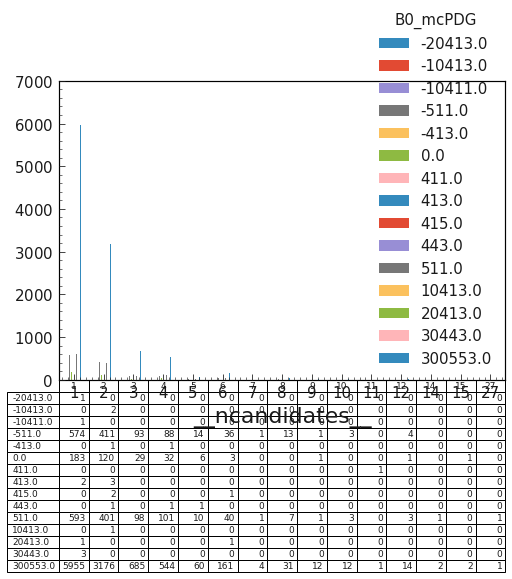

In [8]:
df2.transpose().plot.bar(rot=0,table=True)

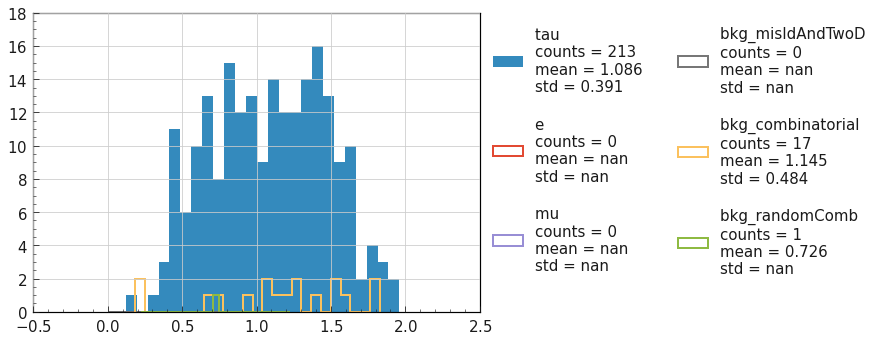

In [5]:
plot_components('B0_CMS_p')

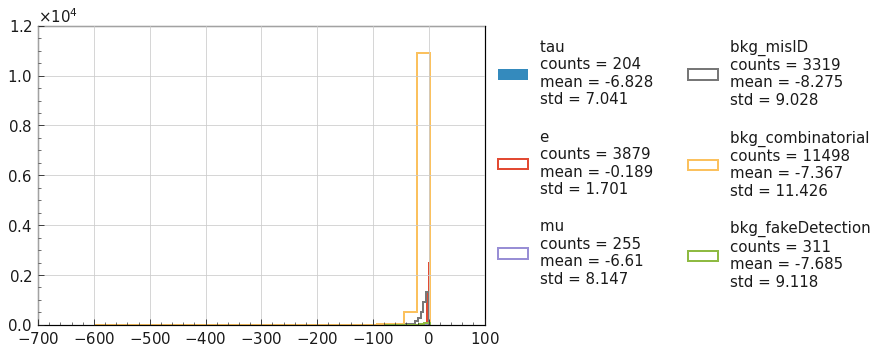

In [33]:
plot_components('B0_cos_pB')

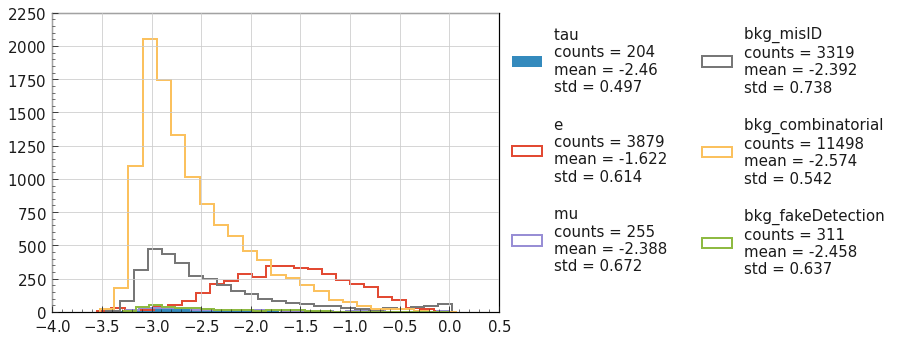

In [34]:
plot_components('B0_dM')
#plt.yscale('log', nonposy='clip')

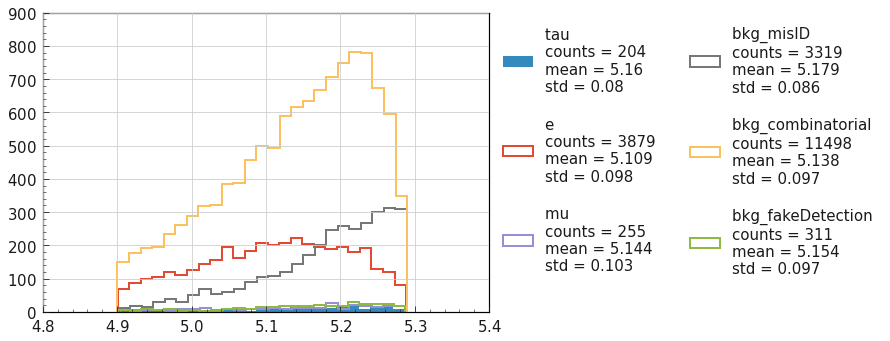

In [36]:
plot_components('B0_Mbc')

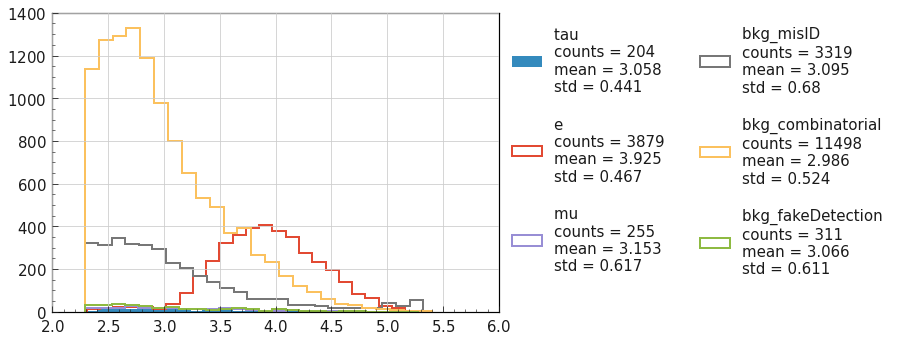

In [37]:
plot_components('B0_CMS_E')

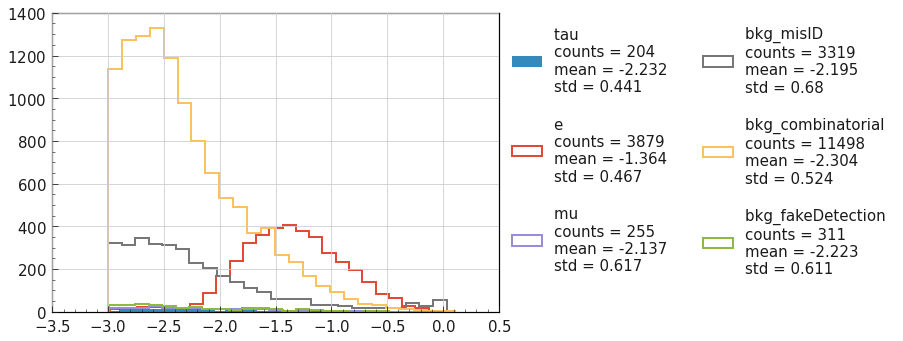

In [38]:
plot_components('B0_deltaE')

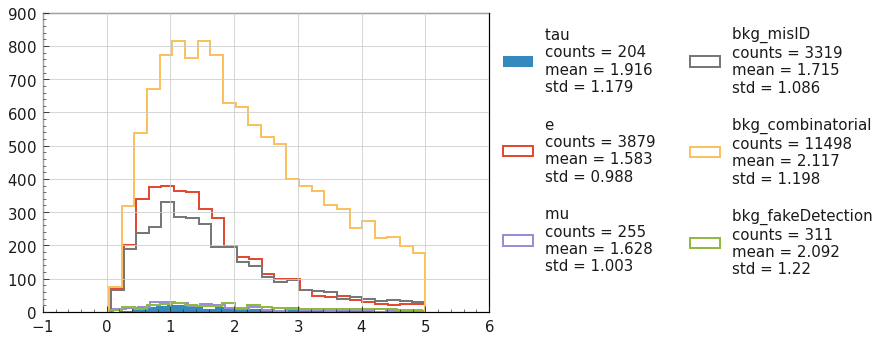

In [39]:
plot_components('B0_vtxReChi2')

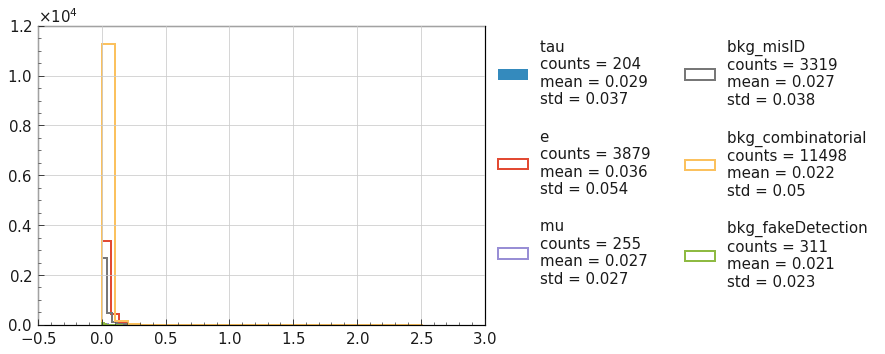

In [40]:
plot_components('B0_vtxDD')

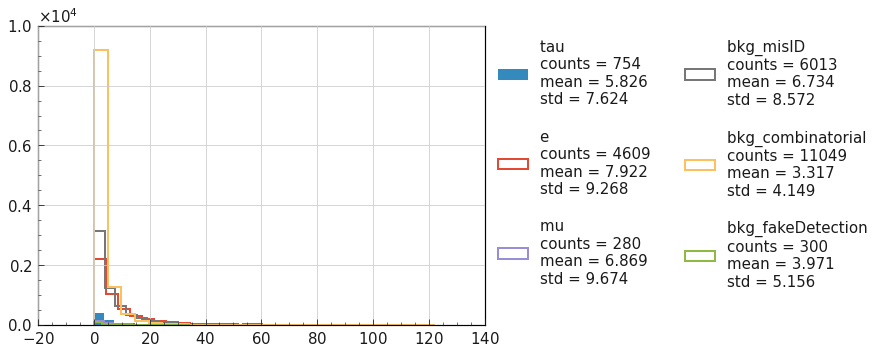

In [183]:
plot_components('B0_vtxDDSig')

## 2. Tag B

### 2.1 Tag Kimematics

In [83]:
roe_kin= df[['B0_CMS_roeE_my_mask','B0_roeM_my_mask', 'B0_CMS_roeP_my_mask', 'B0_CMS_roePt_my_mask',
              'B0_roeMbc_my_mask','B0_roeDeltae_my_mask',
              'B0_roeCharge_my_mask','B0_roeNeextra_my_mask', 'B0_roeEextra_my_mask',
              'B0_nROE_Charged_my_mask', 'B0_nROE_ECLClusters_my_mask','nROE_KLMClusters',
              'B0_nROE_NeutralECLClusters_my_mask', 'B0_nROE_NeutralHadrons_my_mask',
              'B0_nROE_Photons_my_mask','B0_nROE_Tracks_my_mask', 'B0_nROE_RemainingTracks_my_mask']]
roe_kin.describe()

,B0_CMS_roeE_my_mask,B0_roeM_my_mask,B0_CMS_roeP_my_mask,B0_CMS_roePt_my_mask,B0_roeMbc_my_mask,B0_roeDeltae_my_mask,B0_roeCharge_my_mask,B0_roeNeextra_my_mask,B0_roeEextra_my_mask,B0_nROE_Charged_my_mask,B0_nROE_ECLClusters_my_mask,B0_nROE_NeutralECLClusters_my_mask,B0_nROE_NeutralHadrons_my_mask,B0_nROE_Photons_my_mask,B0_nROE_Tracks_my_mask,B0_nROE_RemainingTracks_my_mask,B0_DeltaT,B0_DeltaTErr,B0_DeltaZ
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0,5.995000e+03,5995.000000,5996.000000
mean,4.486501,4.269269,1.135293,0.897557,5.133804,-0.803278,0.066511,1.454391,2.626099,5.111019,11.436073,8.063177,1.897650,8.063177,5.111019,0.0,3.625022e+02,0.875405,3.491107
std,1.577798,1.389972,1.081975,1.001991,0.214798,1.577798,0.978977,0.903907,0.935393,2.127405,4.395450,4.093136,1.271639,4.093136,2.127405,0.0,2.353433e+04,1.906340,238.590734
min,0.925886,0.288476,0.035749,0.011199,0.000000,-4.363892,-4.000000,0.000000,0.212568,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,-4.926500e+03,0.177607,-40.426416
25%,3.553138,3.243350,0.675520,0.469157,5.076953,-1.736640,0.000000,0.710546,1.955260,4.000000,8.000000,5.000000,1.000000,5.000000,4.000000,0.0,-1.196480e+00,0.361479,-0.010394
50%,4.452758,4.277493,1.038651,0.783967,5.186807,-0.837021,0.000000,1.346039,2.603764,4.000000,11.000000,8.000000,2.000000,8.000000,4.000000,0.0,5.520281e-02,0.472464,0.000554
75%,5.351805,5.261190,1.485366,1.213895,5.246469,0.062026,1.000000,2.055849,3.253364,6.000000,15.000000,11.000000,3.000000,11.000000,6.000000,0.0,1.418803e+00,0.712667,0.012363
max,56.146154,24.402168,50.922257,46.660781,5.289658,50.856375,5.000000,6.966502,7.560888,15.000000,33.000000,25.000000,7.000000,25.000000,15.000000,0.0,1.790615e+06,49.776802,18342.149654


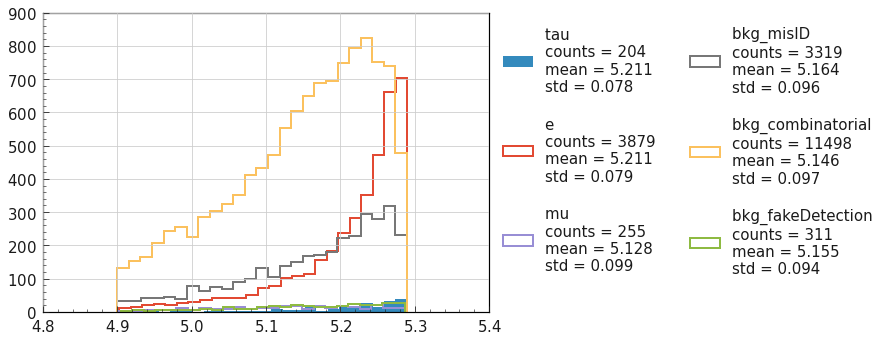

In [41]:
plot_components('B0_roeMbc_my_mask')

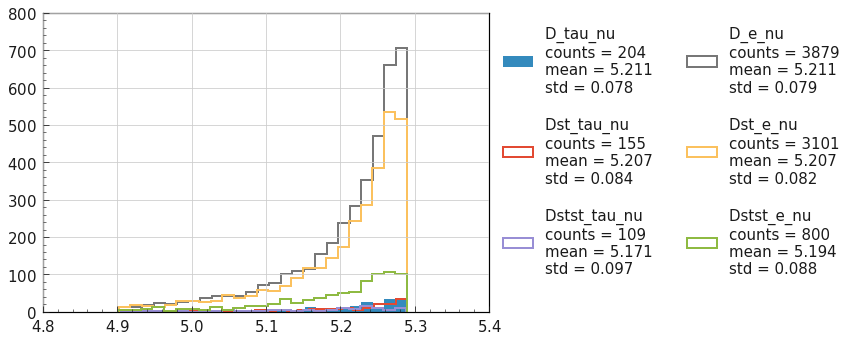

In [42]:
plot_signal('B0_roeMbc_my_mask')

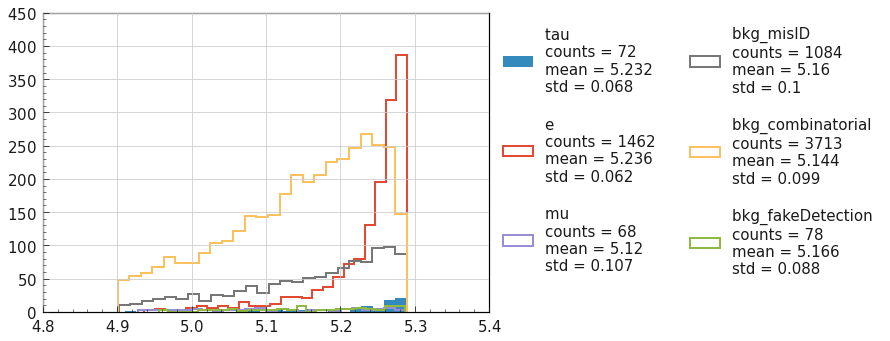

In [43]:
plot_components_withcut('abs(B0_roeDeltae_my_mask)<0.5','B0_roeMbc_my_mask')

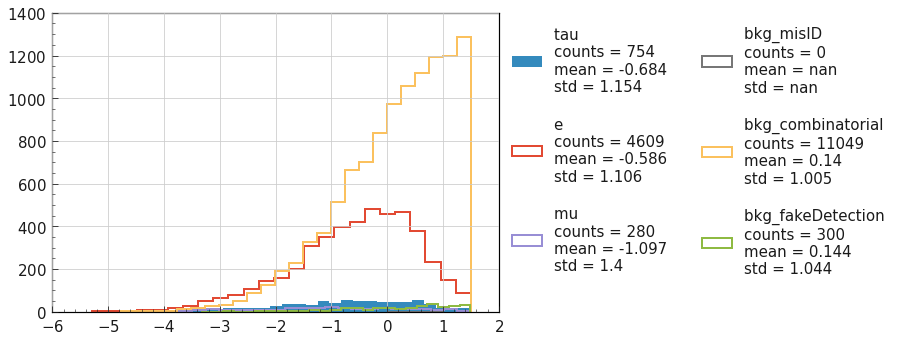

In [28]:
plot_components('B0_roeDeltae_my_mask')

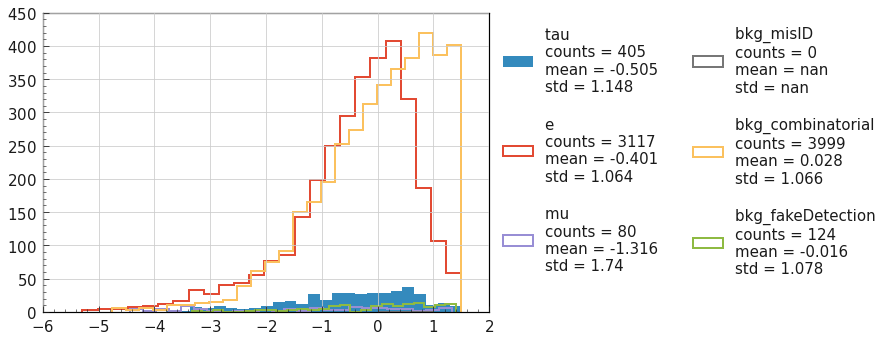

In [33]:
plot_components_withcut('B0_roeMbc_my_mask>5.2','B0_roeDeltae_my_mask')

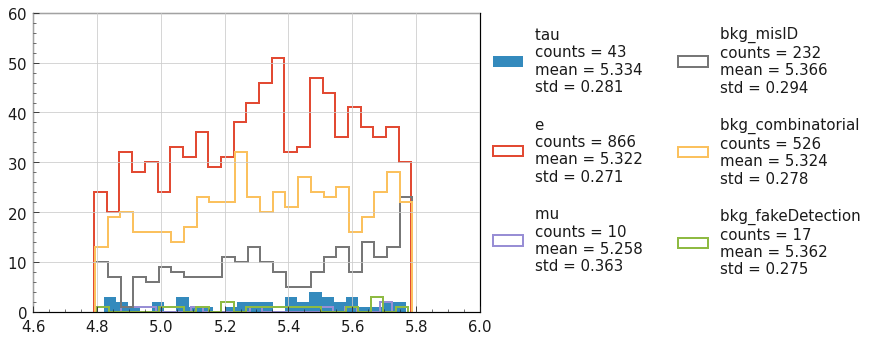

In [79]:
plot_components_withcut('B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5','B0_CMS_roeE_my_mask')

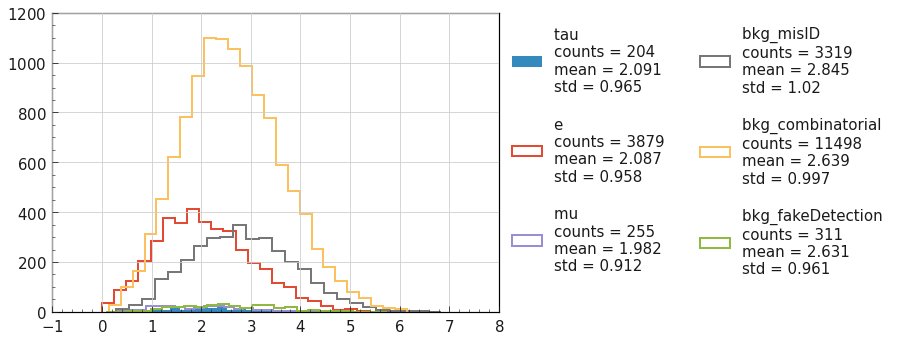

In [47]:
plot_components('B0_roeNeextra_my_mask')

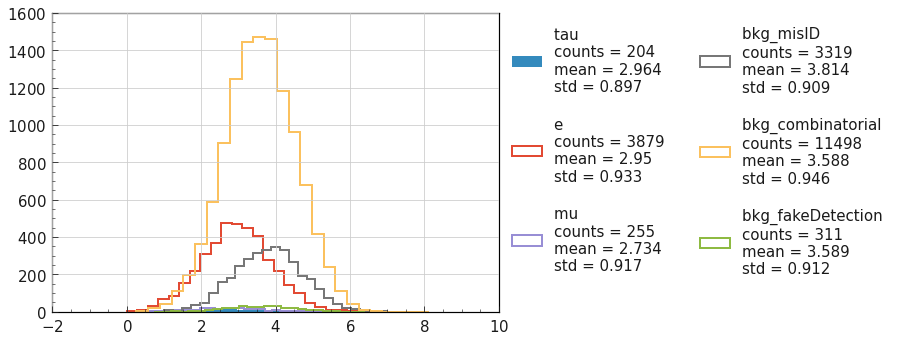

In [48]:
plot_components('B0_roeEextra_my_mask')

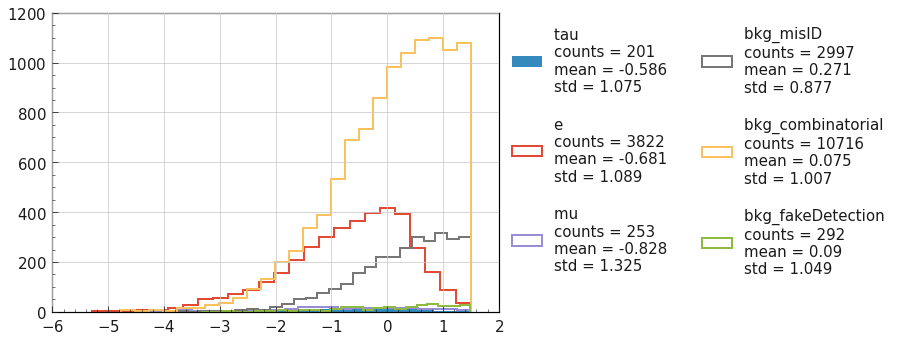

In [73]:
plot_components_withcut('B0_roeEextra_my_mask<5 and B0_roeNeextra_my_mask<5','B0_roeDeltae_my_mask')

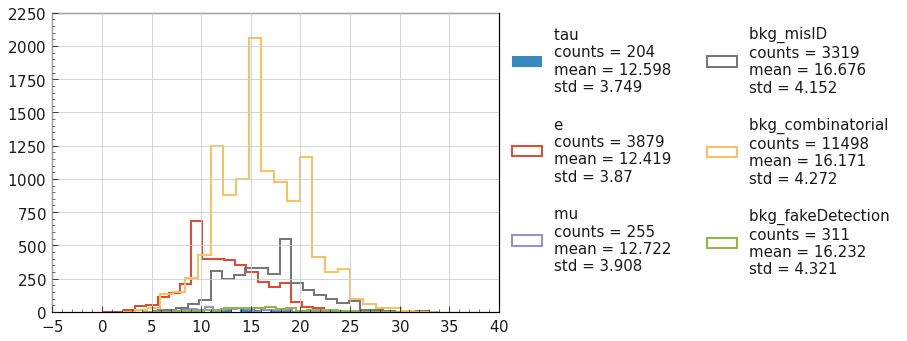

In [56]:
plot_components('B0_nROE_ECLClusters_my_mask')

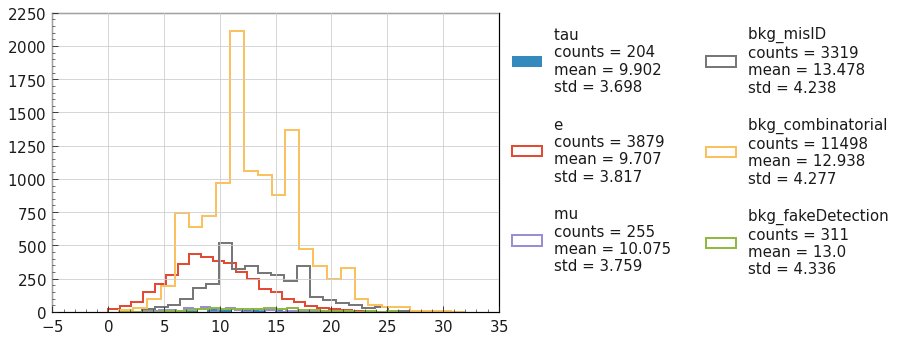

In [58]:
plot_components('B0_nROE_Photons_my_mask')

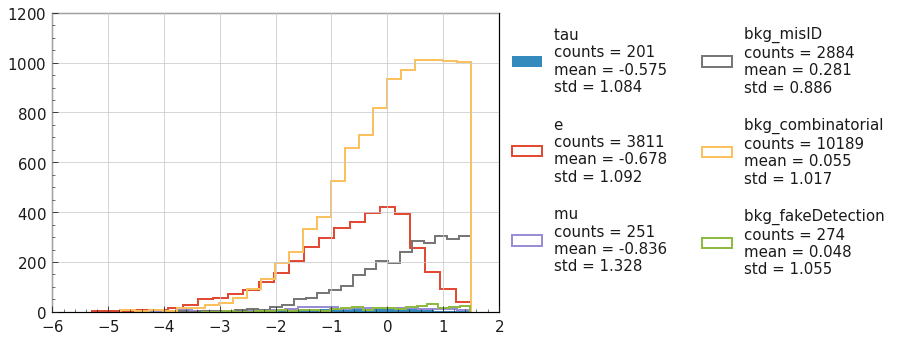

In [69]:
plot_components_withcut('B0_nROE_ECLClusters_my_mask<22 and B0_nROE_Photons_my_mask<20','B0_roeDeltae_my_mask')

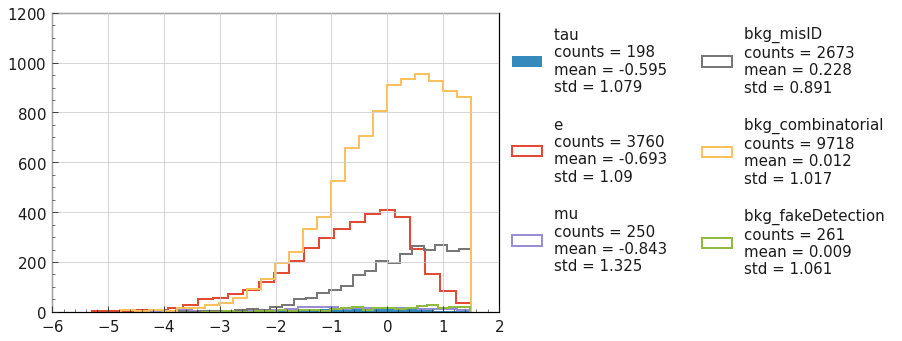

In [80]:
plot_components_withcut('B0_roeEextra_my_mask<5 and B0_roeNeextra_my_mask<5 and B0_nROE_ECLClusters_my_mask<22 and B0_nROE_Photons_my_mask<20','B0_roeDeltae_my_mask')

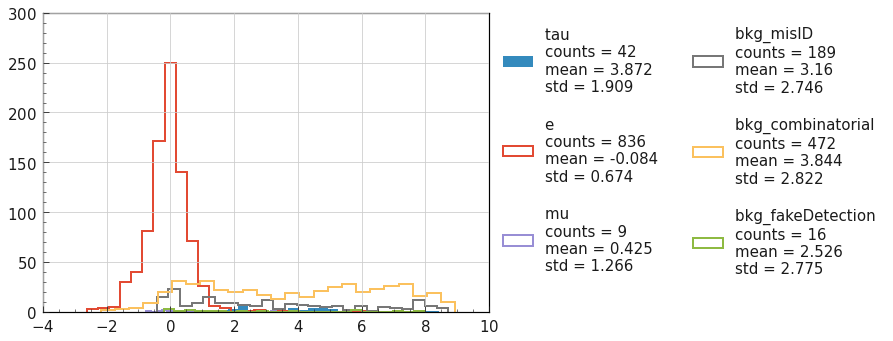

In [82]:
plot_components_withcut('B0_roeMbc_my_mask>5.25 and abs(B0_roeDeltae_my_mask)<0.5 and B0_roeEextra_my_mask<5 and B0_roeNeextra_my_mask<5 and B0_nROE_ECLClusters_my_mask<22 and B0_nROE_Photons_my_mask<20','MM2')

### 2.2 Tag Vertex

In [2]:
roe_vertex = df[['B0_TagVLBoost', 'B0_TagVLBoostErr', 'B0_TagVOBoost',
                 'B0_TagVOBoostErr', 'B0_TagVpVal', 'B0_TagVNDF', 'B0_TagVChi2',
                 'B0_TagVChi2IP', 'B0_TagVx', 'B0_TagVxErr', 'B0_TagVy',
                 'B0_TagVyErr', 'B0_TagVz','B0_TagVzErr']]
roe_vertex.describe()

,B0_TagVLBoost,B0_TagVLBoostErr,B0_TagVOBoost,B0_TagVOBoostErr,B0_TagVpVal,B0_TagVNDF,B0_TagVChi2,B0_TagVChi2IP,B0_TagVx,B0_TagVxErr,B0_TagVy,B0_TagVyErr,B0_TagVz,B0_TagVzErr
count,5995.000000,5995.000000,5995.000000,5995.000000,5999.000000,5999.000000,5999.000000,5999.000000,5996.000000,5999.000000,5996.000000,5999.000000,5996.000000,5999.000000
mean,-0.002036,0.004391,-0.049021,0.002368,0.354162,4.351612,5.714174,2.805705,-0.048769,0.002319,0.017000,0.000199,0.005363,0.004393
std,0.063577,0.006678,0.009276,0.000887,0.277692,28.942677,29.181224,114.599631,0.015320,0.000767,0.000017,0.000005,0.062392,0.006705
min,-0.159663,0.000883,-0.380654,0.000827,-1.000000,-1111.000000,-1111.000000,-1111.000000,-0.393031,0.000000,0.016916,0.000000,-0.141989,0.000000
25%,-0.024566,0.001926,-0.052247,0.001793,0.118233,3.355839,3.207053,0.344400,-0.050634,0.001788,0.016991,0.000199,-0.017165,0.001919
50%,-0.003125,0.002552,-0.048900,0.002222,0.291183,4.831875,5.779770,0.928381,-0.049044,0.002228,0.017000,0.000200,0.004095,0.002561
75%,0.019740,0.003751,-0.045851,0.002772,0.547928,7.010810,8.934626,2.003869,-0.047106,0.002779,0.017009,0.000200,0.027277,0.003754
max,4.145695,0.041061,0.430723,0.022583,0.999736,17.109806,30.584852,7724.998047,1.049751,0.023709,0.017081,0.000200,4.033650,0.041228


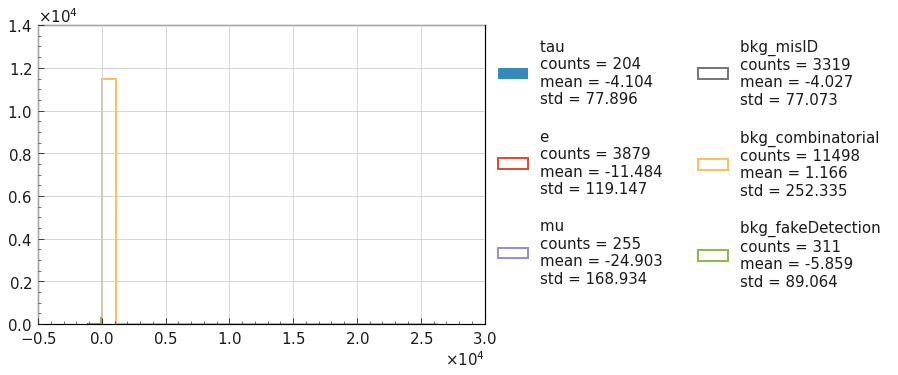

In [52]:
plot_components('B0_TagVChi2IP')

## 3. Flavor Tagger

In [ ]:
ft_info= df[['B0bar_FBDT_qrCombined','B0bar_FANN_qrCombined', 'B0bar_qrMC', 'B0bar_mcFlavorOfOtherB']]
ft_info.describe()

In [ ]:
df.B0bar_qrMC.value_counts()

In [ ]:
df.B0bar_mcFlavorOfOtherB.value_counts()

In [ ]:
df.query('B0bar_mcFlavorOfOtherB==1').B0bar_FBDT_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $B^0$').legend()
df.query('B0bar_mcFlavorOfOtherB==-1').B0bar_FBDT_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $\barB^0$').legend()

In [ ]:
df.query('B0bar_mcFlavorOfOtherB==1').B0bar_FANN_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $B^0$').legend()
df.query('B0bar_mcFlavorOfOtherB==-1').B0bar_FANN_qrCombined.hist(
    range=(-1,1),bins=25,histtype='step',linewidth=1.5,label=r'True $\barB^0$').legend()

## 4. $D^+$

In [5]:
D_info=df[['D_CMS_pt','D_CMS_p', 'D_CMS_E', 'D_isSignal', 'D_mcErrors', 'D_mcPDG',
           'D_dM', 'D_BFM', 'D_BFInvM', 'D_vtxReChi2', 'D_vtxNDF']]
D_info.describe()

,D_CMS_pt,D_CMS_p,D_CMS_E,D_isSignal,D_mcErrors,D_mcPDG,D_dM,D_BFM,D_BFInvM,D_vtxReChi2,D_vtxNDF
count,5999.000000,5999.000000,5999.000000,5918.000000,5999.000000,5918.000000,5999.000000,5999.000000,5999.000000,5999.000000,5999.0
mean,1.001232,1.225600,2.261551,0.635857,127.197866,102998.715444,0.000002,1.861265,1.861265,58.231723,4.0
std,0.431063,0.406736,0.220214,0.481230,170.120501,142654.106197,0.000085,0.021082,0.021082,374.526485,0.0
min,0.008451,0.057412,1.870531,0.000000,0.000000,-511.000000,-0.000025,1.800054,1.800054,0.008859,4.0
25%,0.682766,0.939942,2.092626,0.000000,0.000000,-411.000000,0.000000,1.856568,1.856568,1.057507,4.0
50%,1.005407,1.245441,2.246489,1.000000,0.000000,411.000000,0.000000,1.868089,1.868089,2.560800,4.0
75%,1.309280,1.511132,2.403978,1.000000,312.000000,300553.000000,0.000000,1.872071,1.872071,21.580720,4.0
max,2.725328,4.202374,4.599515,1.000000,512.000000,300553.000000,0.006247,1.899992,1.899992,15694.783203,4.0


In [13]:
df.groupby(['B0_isSignal','D_isSignal']).D_isSignal.count().unstack(level=-1,fill_value=0)

D_isSignal,0.0,1.0
B0_isSignal,,
-1.0,1,4
0.0,2154,1173
1.0,0,2586


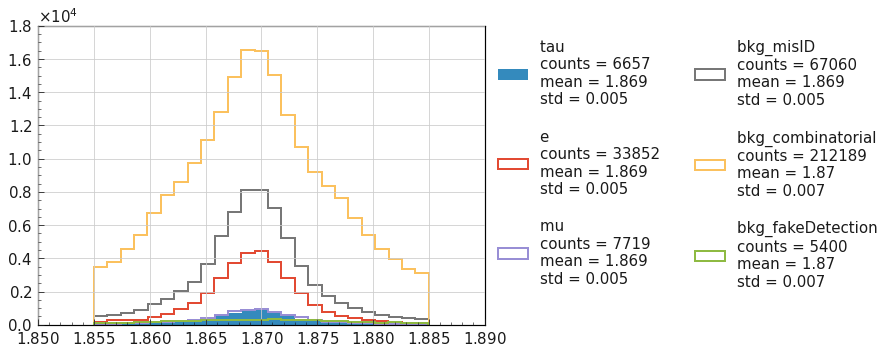

In [126]:
plot_components('D_BFM')

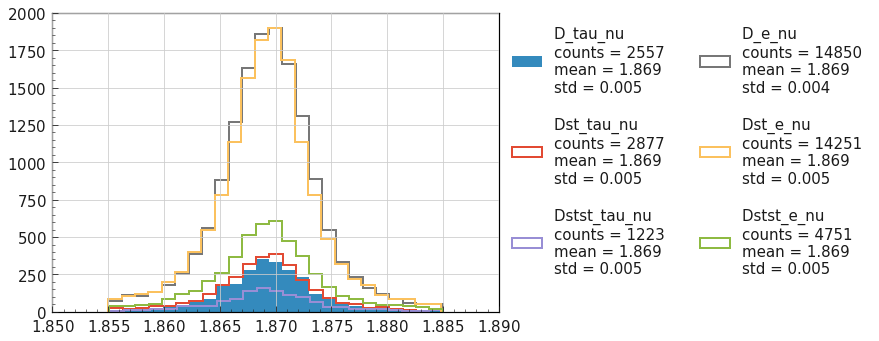

In [127]:
plot_signal('D_BFM')

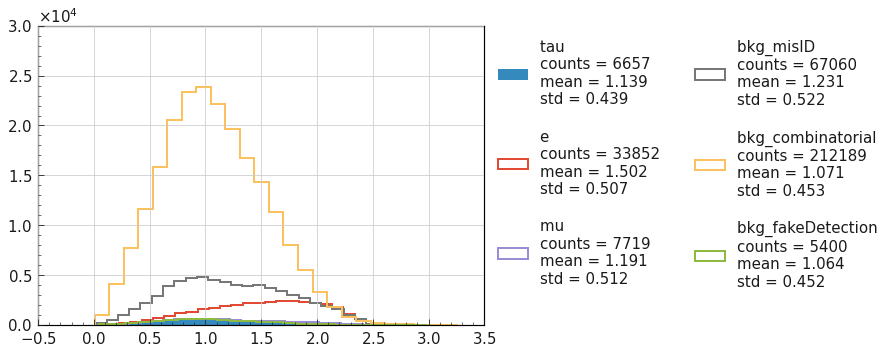

In [128]:
plot_components('D_CMS_p')

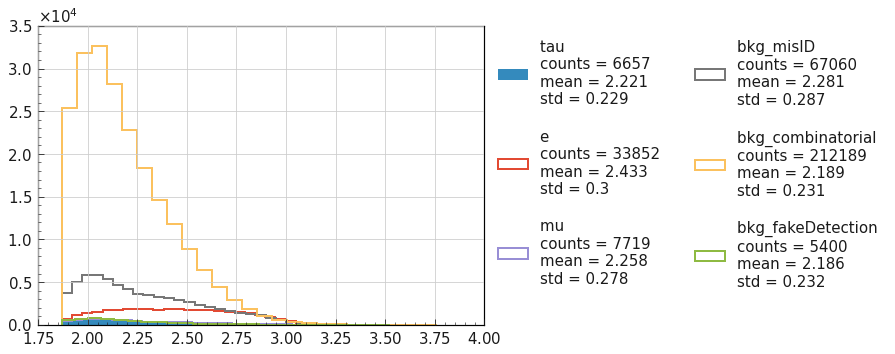

In [129]:
plot_components('D_CMS_E')

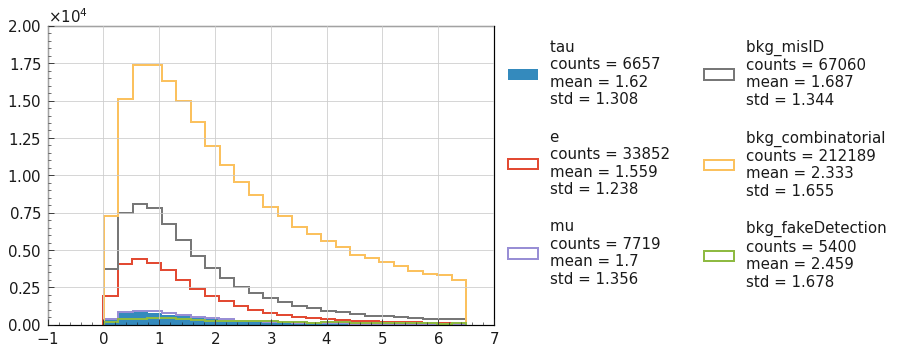

In [130]:
plot_components('D_vtxReChi2')

## 5. $e^-$

In [38]:
e_info=df[['e_CMS_pt', 'e_CMS_p','e_CMS_E', 'e_M', 'e_ErrM', 'e_SigM', 'e_InvM', 'e_isSignal',
           'e_mcErrors', 'e_mcPDG', 'e_dM', 'e_isBremsCorrected']]
e_info.describe()

,e_CMS_pt,e_CMS_p,e_CMS_E,e_M,e_ErrM,e_SigM,e_InvM,e_isSignal,e_mcErrors,e_mcPDG,e_dM,e_isBremsCorrected
count,5999.000000,5999.000000,5999.000000,5999.000000,3123.000000,2931.000000,5999.000000,5994.000000,5999.000000,5994.000000,5999.000000,5999.000000
mean,0.615114,0.726514,0.726515,0.000661,0.001062,0.106598,0.000661,0.851018,76.411402,-1.993827,0.000150,0.019337
std,0.320569,0.351004,0.351005,0.001432,0.002512,0.681543,0.001432,0.356101,249.385932,92.401489,0.001432,0.137716
min,0.048938,0.082709,0.082710,0.000511,0.000000,0.000000,0.000511,0.000000,0.000000,-2212.000000,0.000000,0.000000
25%,0.371372,0.458237,0.458237,0.000511,0.000172,0.000000,0.000511,1.000000,0.000000,-11.000000,0.000000,0.000000
50%,0.554124,0.675068,0.675068,0.000511,0.000448,0.000000,0.000511,1.000000,0.000000,-11.000000,0.000000,0.000000
75%,0.803084,0.941398,0.941398,0.000511,0.001141,0.000000,0.000511,1.000000,0.000000,11.000000,0.000000,0.000000
max,1.961133,2.517238,2.517238,0.035729,0.052352,11.690748,0.035729,1.000000,2048.000000,321.000000,0.035218,1.000000


In [39]:
df.groupby(['B0_isSignal','e_isSignal']).e_isSignal.count().unstack(level=-1,fill_value=0)

e_isSignal,0.0,1.0
B0_isSignal,,
-1.0,11,70
0.0,838,2489
1.0,44,2542


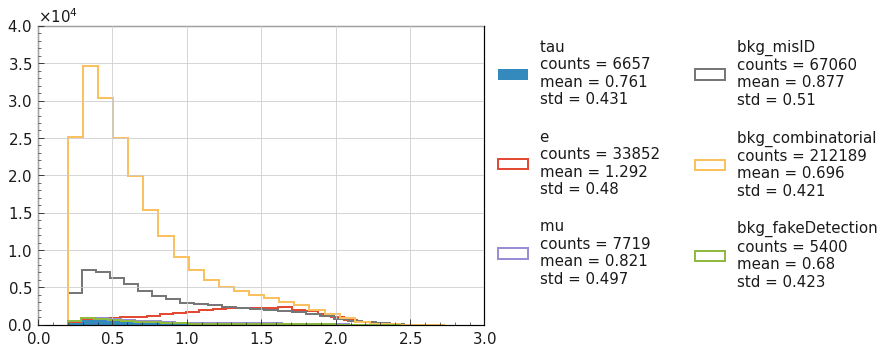

In [131]:
plot_components('e_CMS_p')

In [ ]:
B0_cuts = 'B0_Mbc>4.9 and B0_deltaE>-3 and B0_vtxReChi2<5'
D_cuts = 'and D_vtxReChi2<6.5'
l_cuts = 'and e_CMS_p>0.2'
roe_cuts = 'and B0_roeMbc_my_mask>4.9 and abs(B0_roeDeltae_my_mask)<1.5'
#and B0_roeCharge_my_mask==0'
all_cuts = B0_cuts + D_cuts + l_cuts + roe_cuts

## 7. Missing Mass^2

In [21]:
def naive_mm2(data):
    # Energy and nominal mass
    E_B = df_event.Ecms.mean() / 2
    E_Dl = data.D_CMS_E + data.e_CMS_E
    M_B = pdg.get('anti-B0').Mass()
    Mbc = data.B0_Mbc
    # 3 momentum
    p_Dl_x = data.D_CMS_px + data.e_CMS_px
    p_Dl_y = data.D_CMS_py + data.e_CMS_py
    p_Dl_z = data.D_CMS_pz + data.e_CMS_pz
    # Calculating intermediate quantities
    p_Dl2 = p_Dl_x**2 + p_Dl_y**2 + p_Dl_z**2
    p_Dl = np.sqrt(p_Dl2)
    p_B = np.sqrt(E_B**2 - M_B**2)
    m_Dl2 = E_Dl**2 - p_Dl2
    # Calculating the final quantities
    naive_missing_m2 = Mbc**2 + m_Dl2 - 2*E_B*E_Dl
    cos_theta_BY = -naive_missing_m2 / (2*p_B*p_Dl)
    return {'mm2': naive_missing_m2, 'cos': cos_theta_BY}

In [22]:
# MM2 with ROE = (E_Y4S/2 - E_D - E_l)^2 - (p_cm - p_roe - p_D - p_l)^2
# Use ROE information p_roe only, E_roe has bad resolution and is unnecessary
# Note that p are 3 momenta vectors and p_cm is 0 (center of momentum frame)
def withROE_mm2_1(data):
    # Energy
    E_B = df_event.Ecms.mean()/2
    E_Dl = data.D_CMS_E + data.e_CMS_E
    E_miss = E_B - E_Dl
#    M_B = pdg.get('anti-B0').Mass()
    # 3 momentum
    p_x = data.B0_CMS_roePx_my_mask + data.D_CMS_px + data.e_CMS_px
    p_y = data.B0_CMS_roePy_my_mask + data.D_CMS_py + data.e_CMS_py
    p_z = data.B0_CMS_roePz_my_mask + data.D_CMS_pz + data.e_CMS_pz
    # Calculating intermediate quantities
    p_miss2 = p_x**2 + p_y**2 + p_z**2
    # Calculating the final quantities
    withROE_missing_m2 = E_miss**2 - p_miss2
    cos_theta_BY = 0
    return {'mm2': withROE_missing_m2, 'cos': cos_theta_BY}

In [12]:
# MM2 with ROE = Mbc_roe^2 + M_Y^2 - 2*E_Beam*E_Y - 2*(p_roe dot p_Y)
# Use ROE information p_roe only, E_roe has bad resolution and is unnecessary
# Note that p are 3 momenta vectors and p_cm is 0 (center of momentum frame)
def withROE_mm2_2(data):
    # Energy
    E_B = df_event.Ecms.mean()/2
    E_Y = data.D_CMS_E + data.e_CMS_E
    M_B = pdg.get('anti-B0').Mass()
    Mbc_roe = data.B0_roeMbc_my_mask
    # Calculating M_Y^2
    p_Yx = data.D_CMS_px + data.e_CMS_px
    p_Yy = data.D_CMS_py + data.e_CMS_py
    p_Yz = data.D_CMS_pz + data.e_CMS_pz
    p_Y2 = p_Yx**2 + p_Yy**2 + p_Yz**2
    m_Y2 = E_Y**2 - p_Y2
    # dot product
    p_xdot = data.B0_CMS_roePx_my_mask * p_Yx
    p_ydot = data.B0_CMS_roePy_my_mask * p_Yy
    p_zdot = data.B0_CMS_roePz_my_mask * p_Yz
    p_dot = p_xdot + p_ydot + p_zdot
    # Calculating the final quantities
    withROE_missing_m2 = M_B**2 + m_Y2 - 2*E_B*E_Y - 2*p_dot
    cos_theta_BY = 0
    return {'mm2': withROE_missing_m2, 'cos': cos_theta_BY}

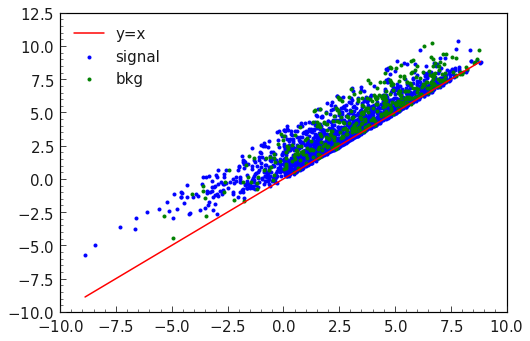

In [27]:
variable='mm2'
sig_mm2_1=withROE_mm2_1(df_bestSelected.query(sig))[variable]
bkg_mm2_1=withROE_mm2_1(df_bestSelected.query(bkg))[variable]
sig_mm2_2=withROE_mm2_2(df_bestSelected.query(sig))[variable]
bkg_mm2_2=withROE_mm2_2(df_bestSelected.query(bkg))[variable]
plt.scatter(sig_mm2_1,sig_mm2_2,marker='.',color='blue',label='signal')
plt.scatter(bkg_mm2_1,bkg_mm2_2,marker='.',color='green',label='bkg')
a=sig_mm2_1.min()
b=sig_mm2_1.max()
plt.plot([a,b],[a,b],color='red',label='y=x')
plt.legend()

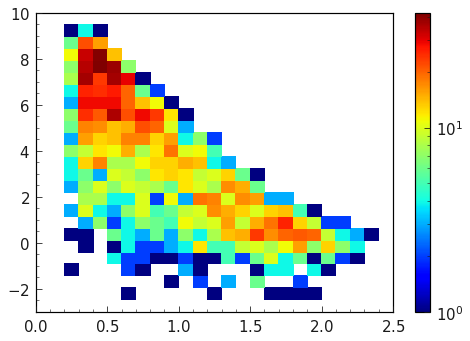

In [13]:
h_l=plt.hist2d(df_bkg_comb.e_CMS_p, df_bkg_comb.MM2,
               range=[[0,2.5], [-3,10]], bins=25,cmap='jet',norm=colors.LogNorm())
plt.colorbar()
#plt.savefig('2dplot.pdf')

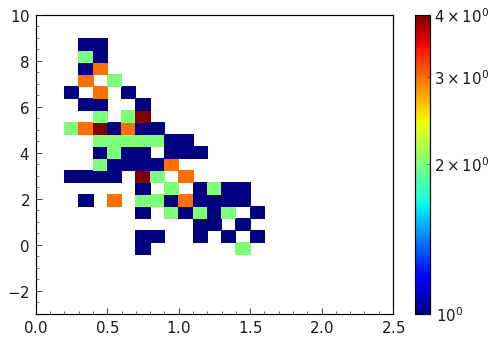

In [14]:
h_l=plt.hist2d(D_tau_nu.e_CMS_p, D_tau_nu.MM2,
               range=[[0,2.5], [-3,10]], bins=25,cmap='jet',norm=colors.LogNorm())
plt.colorbar()

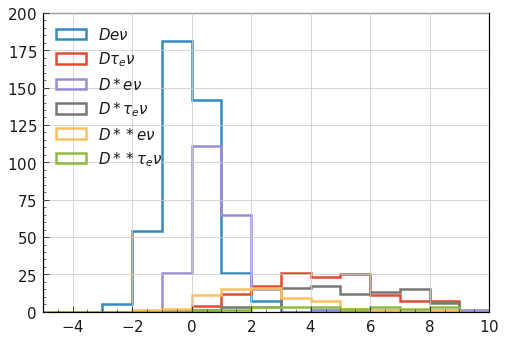

In [27]:
plot(df_dict=df_best_dict,calculation=withROE_mm2_2,variable='mm2')